In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pandas.plotting import register_matplotlib_converters
import numpy as np
sns.set_style('darkgrid')
register_matplotlib_converters()
# matplotlib 環境設定，讓matplotlib可以顯示中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# get the data from csv
data_path = glob.glob("../../**/VegPirceTracking/March_October_veggie_data.csv", recursive=True)[0]
df = pd.read_csv(data_path)

df.head()

Unnamed: 0 code crop variety  ceilling price  moderate price  floor price  \
0           0  FA1  黃秋葵     NaN           105.0            65.0         25.0   
1           1  FB1  花椰菜      青梗            84.0            47.0         15.0   
2           2  FC1   胡瓜      黑刺            40.0            24.0          8.0   
3           3  FD1  花胡瓜     NaN            95.0            70.0         38.0   
4           4  FE1   冬瓜      白皮            18.0            12.0          6.0   

        date  
0  110/10/17  
1  110/10/17  
2  110/10/17  
3  110/10/17  
4  110/10/17

In [2]:
# Clean up the data
df.drop('Unnamed: 0', axis=1, inplace= True)
# Replace nan in variety
df['variety'] = df['variety'].replace(np.nan, 'no variety')

In [3]:
# Convert messy date into datetime object
df[['Year','date_']] = df['date'].astype('str').str.split('/', n=1, expand=True)
df['Year'] = df['Year'].astype('int') + 1911
df['Date'] = (df['Year'].astype('str') +'/'+ df['date_']).astype('datetime64[ns]')
df.drop(columns=['date', 'Year', 'date_'], inplace = True)

print(df.head())

  code crop     variety  ceilling price  moderate price  floor price  \
0  FA1  黃秋葵  no variety           105.0            65.0         25.0   
1  FB1  花椰菜          青梗            84.0            47.0         15.0   
2  FC1   胡瓜          黑刺            40.0            24.0          8.0   
3  FD1  花胡瓜  no variety            95.0            70.0         38.0   
4  FE1   冬瓜          白皮            18.0            12.0          6.0   

        Date  
0 2021-10-17  
1 2021-10-17  
2 2021-10-17  
3 2021-10-17  
4 2021-10-17  


In [4]:
# Feel the data
print(df.dtypes)
print(df.describe(include='all', datetime_is_numeric=True))

code                      object
crop                      object
variety                   object
ceilling price           float64
moderate price           float64
floor price              float64
Date              datetime64[ns]
dtype: object
         code   crop     variety  ceilling price  moderate price  \
count   33580  33580       33580    33579.000000    33579.000000   
unique    104     55          87             NaN             NaN   
top       LA1     韭菜  no variety             NaN             NaN   
freq      406   1622        3623             NaN             NaN   
mean      NaN    NaN         NaN       74.971649       53.897823   
min       NaN    NaN         NaN        6.000000        5.000000   
25%       NaN    NaN         NaN       31.000000       21.000000   
50%       NaN    NaN         NaN       50.000000       36.000000   
75%       NaN    NaN         NaN       97.000000       70.000000   
max       NaN    NaN         NaN      735.000000      655.000000   
std    

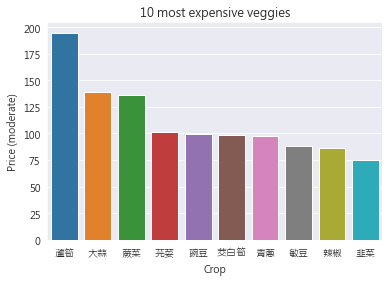

In [5]:
# Top 10 expensive veggies
temp_df = df.groupby('crop').mean().sort_values('moderate price', ascending = False).head(10)
sns.barplot(x = temp_df.index, y = 'moderate price', data = temp_df)
plt.xlabel('Crop')
plt.ylabel('Price (moderate)')
plt.title('10 most expensive veggies')
plt.show()

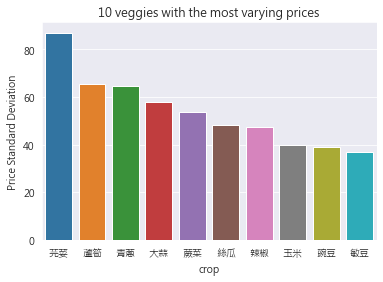

In [6]:
# 10 veggies with the most varying prices
temp_df = df.groupby('crop').std().sort_values('moderate price', ascending = False).head(10)
sns.barplot(x = temp_df.index, y = 'moderate price', data = temp_df)
plt.ylabel('Price Standard Deviation')
plt.title('10 veggies with the most varying prices')
plt.show()

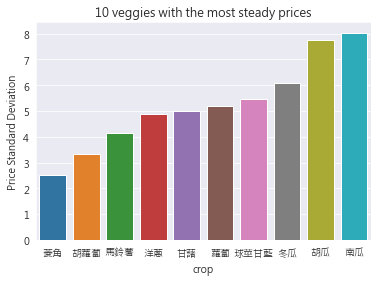

In [7]:
# 10 veggies with the most steady prices
temp_df = df.groupby('crop').std().sort_values('moderate price', ascending = True).head(10)
sns.barplot(x = temp_df.index, y = 'moderate price', data = temp_df)
plt.ylabel('Price Standard Deviation')
plt.title('10 veggies with the most steady prices')
plt.show()

/Users/yichenshih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/yichenshih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


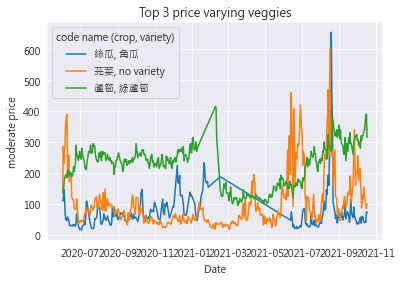

In [8]:
top_3_var = list(df.groupby('code').std().sort_values('moderate price', ascending = False).index[0:3]) # find out the top 3 varitety with highest varying price

df_temp = df[df['code'].isin(top_3_var)] # filter out the top 3 varitety with highest varying price
df_temp.loc[:,'code name (crop, variety)'] = df['crop'] + ", " + df['variety'] # give them a name for legend

plot1 = sns.lineplot(x= 'Date', y='moderate price', hue= 'code name (crop, variety)', data = df_temp)
plt.title('Top 3 price varying veggies')
plt.show()


/Users/yichenshih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/yichenshih/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='Date', ylabel='moderate price'>

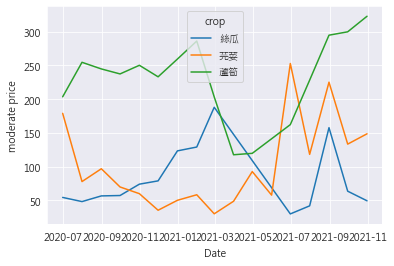

In [31]:
df1 = df[df['code'].isin(top_3_var)]
df1.loc[:, 'Month'] = pd.DatetimeIndex(df1['Date']).month
temp_df = df1.groupby(['crop',pd.Grouper(freq='M', key='Date')]).mean()
sns.lineplot(x = 'Date', y = 'moderate price', data = temp_df, hue = 'crop')


[0, 1, 2]